In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder

In [3]:
dataframe_code = pd.read_csv("prefecture_code.csv")
dataframe_code = dataframe_code.rename(columns={"Code": "Prefecture_ID", "EnName": "Prefecture"})
dataframe_code = dataframe_code.drop(columns=['JpName'])

In [4]:
dataframe_code

,Prefecture_ID,Prefecture
0,1,Hokkaido
1,2,Aomori
2,3,Iwate
3,4,Miyagi
4,5,Akita
5,6,Yamagata
6,7,Fukushima
7,8,Ibaraki
8,9,Tochigi
9,10,Gunma


In [5]:
folder = "trade_prices"
dataframes = []

for archivo in os.listdir(folder):
    if archivo.endswith(".csv"):
        ruta_archivo = os.path.join(folder, archivo)
        df = pd.read_csv(ruta_archivo)
        
        df = df.iloc[:, 1:]
        
        dataframes.append(df)

df_final = pd.concat(dataframes, ignore_index=True)
df_final.index = range(1, len(df_final) + 1)

C:\Users\solro\AppData\Local\Temp\ipykernel_20804\608516289.py:7: DtypeWarning: Columns (12,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\solro\AppData\Local\Temp\ipykernel_20804\608516289.py:7: DtypeWarning: Columns (12,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\solro\AppData\Local\Temp\ipykernel_20804\608516289.py:7: DtypeWarning: Columns (12,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\solro\AppData\Local\Temp\ipykernel_20804\608516289.py:7: DtypeWarning: Columns (12,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)
C:\Users\solro\AppData\Local\Temp\ipykernel_20804\608516289.py:7: DtypeWarning: Columns (12,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.re

In [6]:
df_final

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks
1,Residential Land(Land Only),Residential Area,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,28,28.0,28.0,...,City Road,10.2,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2018,2018,4,NaN,NaN
2,Residential Land(Land Only),Residential Area,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,27,27.0,27.0,...,City Road,7.2,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2018,2018,4,NaN,NaN
3,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,...,NaN,NaN,Neighborhood Commercial Zone,80.0,200.0,4th quarter 2018,2018,4,Not yet,NaN
4,Residential Land(Land Only),Residential Area,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,26,26.0,26.0,...,Private Road,4.0,Category I Exclusively Low-story Residential Zone,40.0,80.0,2nd quarter 2018,2018,2,NaN,NaN
5,Residential Land(Land Only),Residential Area,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,...,City Road,7.2,Category I Exclusively Low-story Residential Zone,40.0,80.0,2nd quarter 2018,2018,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906514,Agricultural Land,NaN,47382,Okinawa Prefecture,"Yonaguni Town,Yaeyama County",Aza Yonaguni,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3rd quarter 2007,2007,3,NaN,NaN
3906515,Agricultural Land,NaN,47382,Okinawa Prefecture,"Yonaguni Town,Yaeyama County",Aza Yonaguni,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3rd quarter 2007,2007,3,NaN,NaN
3906516,Agricultural Land,NaN,47382,Okinawa Prefecture,"Yonaguni Town,Yaeyama County",Aza Yonaguni,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2nd quarter 2007,2007,2,NaN,NaN
3906517,Agricultural Land,NaN,47382,Okinawa Prefecture,"Yonaguni Town,Yaeyama County",Aza Yonaguni,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2nd quarter 2007,2007,2,NaN,NaN


In [7]:
dataframe_final = pd.merge(df_final, dataframe_code, on="Prefecture", how="left")

In [8]:
dataframe_final['Year'] = pd.to_numeric(dataframe_final['Year'], errors='coerce')
ultimo_anio = dataframe_final['Year'].max()
df_ultimos_10_anios = dataframe_final[dataframe_final['Year'] >= (ultimo_anio - 10)]
tendencia_precio = df_ultimos_10_anios.groupby('Year')['TradePrice'].median().reset_index()
tendencia_precio


,Year,TradePrice
0,2009,13000000.0
1,2010,14000000.0
2,2011,14000000.0
3,2012,13000000.0
4,2013,13000000.0
5,2014,13000000.0
6,2015,14000000.0
7,2016,14000000.0
8,2017,14000000.0
9,2018,14000000.0


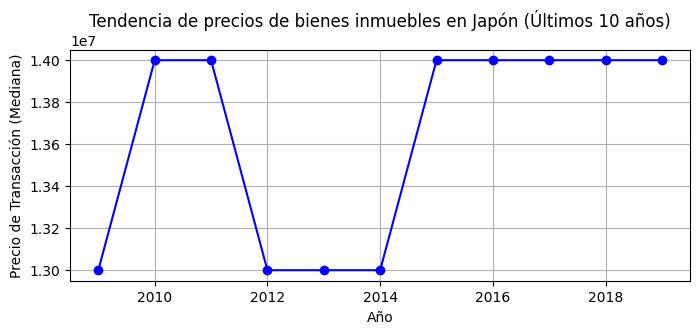

In [9]:
plt.figure(figsize=(8, 3))
plt.plot(tendencia_precio['Year'], tendencia_precio['TradePrice'], marker='o', linestyle='-', color='blue')
plt.title('Tendencia de precios de bienes inmuebles en Japón (Últimos 10 años)')
plt.xlabel('Año')
plt.ylabel('Precio de Transacción (Mediana)')
plt.grid(True)
plt.show()

El precio de los bienes inmuebles en Japón en los últimos 10 años se vio afectado de la siguiente forma. Podemos ver que aumento en el año 2009, pero despues de permanecer constante en el periodo de un año sufre una caida en el año 2011 hasta el 2015, ya que vemos que en el año 2014 aumenta por un año y luego se mantiene constante hasta la ultima fecha (2019).

In [10]:
dataframe_final['Location'] = dataframe_final['Prefecture'].apply(lambda x: 'Tokyo' if x == 'Tokyo' else 'Other')
estadisticas = dataframe_final.groupby('Location')['TradePrice'].describe()
# Imprime estadísticas descriptivas
print(estadisticas)


              count          mean           std    min         25%  \
Location                                                             
Other     3499943.0  2.319335e+07  1.054818e+08  100.0   4100000.0   
Tokyo      406575.0  6.559070e+07  3.092895e+08  500.0  21000000.0   

                 50%         75%           max  
Location                                        
Other     12000000.0  26000000.0  4.700000e+10  
Tokyo     35000000.0  54000000.0  6.100000e+10  


In [14]:
tokyo_prices = dataframe_final[dataframe_final['Location'] == 'Tokyo']['TradePrice']
other_prices = dataframe_final[dataframe_final['Location'] == 'Other']['TradePrice']
t_stat, p_value = ttest_ind(tokyo_prices, other_prices, nan_policy='omit')

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

Estadístico t: 181.2812884083858
Valor p: 0.0


Podemos ver que el valor de p es menor a 0.05 en la prueba t, eso indica que la diferencia de precios entre Tokio y las áreas locales es estadísticamente significativa

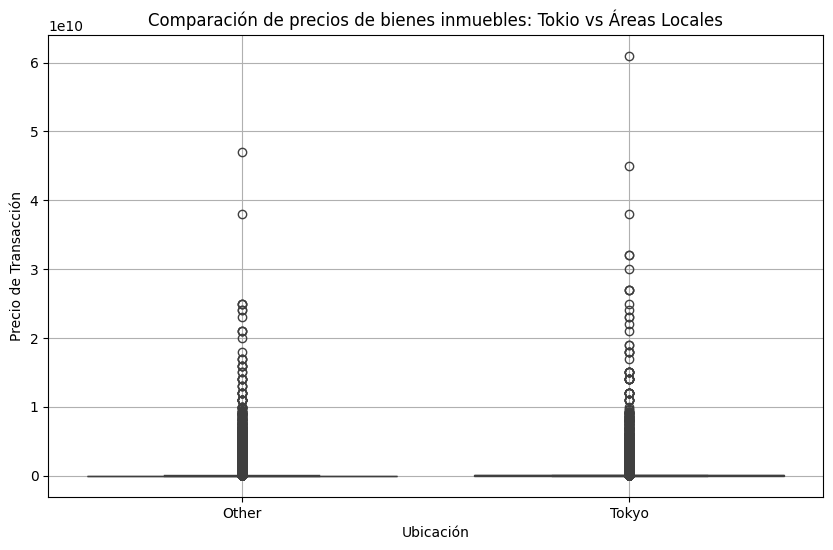

In [11]:
# Visualizar con un gráfico de cajas (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='TradePrice', data=dataframe_final)
plt.title('Comparación de precios de bienes inmuebles: Tokio vs Áreas Locales')
plt.xlabel('Ubicación')
plt.ylabel('Precio de Transacción')
plt.grid(True)
plt.show()

Diferencia grafica de precios entre Tokio y las áreas locales

In [12]:
# Verificar duplicados
duplicados = dataframe_final.duplicated()
num_duplicados = duplicados.sum()
print(f"Total de filas duplicadas: {num_duplicados}")

# Muestra ejemplos de duplicados (si existen)
if num_duplicados > 0:
    print("Ejemplos de filas duplicadas:")
    print(dataframe_final[duplicados].head())
else:
    print("No se encontraron duplicados.")

Total de filas duplicadas: 19447
Ejemplos de filas duplicadas:
                              Type           Region  MunicipalityCode  \
187    Residential Land(Land Only)  Commercial Area              1101   
1389  Pre-owned Condominiums, etc.              NaN              1101   
1410  Pre-owned Condominiums, etc.              NaN              1101   
1779  Pre-owned Condominiums, etc.              NaN              1101   
1856  Pre-owned Condominiums, etc.              NaN              1101   

     Prefecture            Municipality    DistrictName  NearestStation  \
187    Hokkaido  Chuo Ward,Sapporo City     Odoorinishi  Nishi 18-chome   
1389   Hokkaido  Chuo Ward,Sapporo City  Kita2johigashi           Naebo   
1410   Hokkaido  Chuo Ward,Sapporo City    Kita3jonishi  Nishi 18-chome   
1779   Hokkaido  Chuo Ward,Sapporo City    Kita4jonishi  Nishi 28-chome   
1856   Hokkaido  Chuo Ward,Sapporo City    Kita4jonishi  Nishi 11-chome   

     TimeToNearestStation  MinTimeToNearestStat

Se encuentran un total de 19447 duplicados, por lo que se eliminan

In [13]:
df_final_sin_duplicados = dataframe_final.drop_duplicates()

# Verifica que los duplicados han sido eliminados
print(f"Total de filas después de eliminar duplicados: {len(df_final_sin_duplicados)}")
df_final_sin_duplicados.index = range(1, len(df_final_sin_duplicados) + 1)

Total de filas después de eliminar duplicados: 3887071


In [14]:
df_final_sin_duplicados

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Prefecture_ID,Location
1,Residential Land(Land Only),Residential Area,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,28,28.0,28.0,...,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2018,2018,4,NaN,NaN,1.0,Other
2,Residential Land(Land Only),Residential Area,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,27,27.0,27.0,...,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2018,2018,4,NaN,NaN,1.0,Other
3,"Pre-owned Condominiums, etc.",NaN,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,20,20.0,20.0,...,Neighborhood Commercial Zone,80.0,200.0,4th quarter 2018,2018,4,Not yet,NaN,1.0,Other
4,Residential Land(Land Only),Residential Area,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,26,26.0,26.0,...,Category I Exclusively Low-story Residential Zone,40.0,80.0,2nd quarter 2018,2018,2,NaN,NaN,1.0,Other
5,Residential Land(Land Only),Residential Area,1101,Hokkaido,"Chuo Ward,Sapporo City",Asahigaoka,Maruyamakoen,23,23.0,23.0,...,Category I Exclusively Low-story Residential Zone,40.0,80.0,2nd quarter 2018,2018,2,NaN,NaN,1.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887067,Agricultural Land,NaN,47382,Okinawa Prefecture,"Yonaguni Town,Yaeyama County",Aza Yonaguni,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3rd quarter 2007,2007,3,NaN,NaN,NaN,Other
3887068,Agricultural Land,NaN,47382,Okinawa Prefecture,"Yonaguni Town,Yaeyama County",Aza Yonaguni,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3rd quarter 2007,2007,3,NaN,NaN,NaN,Other
3887069,Agricultural Land,NaN,47382,Okinawa Prefecture,"Yonaguni Town,Yaeyama County",Aza Yonaguni,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2nd quarter 2007,2007,2,NaN,NaN,NaN,Other
3887070,Agricultural Land,NaN,47382,Okinawa Prefecture,"Yonaguni Town,Yaeyama County",Aza Yonaguni,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2nd quarter 2007,2007,2,NaN,NaN,NaN,Other


In [15]:
# Seleccionar las columnas relevantes 
caracteristicas = ['Area', 'Region', 'Year', 'Prefecture_ID', 'UnitPrice', 'MaxTimeToNearestStation', 'Direction', 'Purpose']
df_final_sin_duplicados = df_final_sin_duplicados[caracteristicas + ['TradePrice']].dropna()

In [16]:
region_map = {
    'Residential Area': 1,
    'Potential Residential Area': 2,
    'Commercial Area': 3,
    'Industrial Area': 4
}

df_final_sin_duplicados['Region'] = df_final_sin_duplicados['Region'].map(region_map)

direction_map = {
    'South': 1,
    'East': 6,
    'West': 4,
    'Southeast': 3,
    'Northwest':7,
    'North':8,
    'Northeast':5,
    'Southwest':2,
    'No facing road':0
}

df_final_sin_duplicados['Direction'] = df_final_sin_duplicados['Direction'].map(direction_map)

purpose_map = {
    'Other':6, 
    'House':1,
    'Office':5, 
    'Shop':3, 
    'Warehouse':2, 
    'Factory':4
}

df_final_sin_duplicados['Purpose'] = df_final_sin_duplicados['Purpose'].map(purpose_map)

In [17]:
#Dataframe final para el entrenamiento
df_modelo = df_final_sin_duplicados
df_modelo.index = range(1, len(df_modelo) + 1)

In [18]:
df_modelo

,Area,Region,Year,Prefecture_ID,UnitPrice,MaxTimeToNearestStation,Direction,Purpose,TradePrice
1,1100,1,2018,1.0,78000.0,28.0,1,6,86000000
2,310,1,2018,1.0,120000.0,27.0,6,1,38000000
3,430,1,2018,1.0,58000.0,23.0,4,1,25000000
4,165,1,2017,1.0,120000.0,29.0,3,1,20000000
5,370,1,2016,1.0,62000.0,24.0,4,1,23000000
...,...,...,...,...,...,...,...,...,...
41761,100,1,2013,13.0,240000.0,24.0,8,1,24000000
41762,860,3,2013,13.0,190000.0,8.0,8,1,160000000
41763,110,1,2013,13.0,150000.0,19.0,2,1,17000000
41764,145,1,2013,13.0,250000.0,11.0,8,1,37000000


In [31]:
#Debido a que contamos con valores de diferentes escalas pasaremos a normalizar los datos antes de procesarlos
norm_scaler = StandardScaler()
df_modelo = pd.DataFrame(norm_scaler.fit_transform(df_modelo), columns=df_modelo.columns)

In [19]:
df_modelo

,Area,Region,Year,Prefecture_ID,UnitPrice,MaxTimeToNearestStation,Direction,Purpose,TradePrice
1,1100,1,2018,1.0,78000.0,28.0,1,6,86000000
2,310,1,2018,1.0,120000.0,27.0,6,1,38000000
3,430,1,2018,1.0,58000.0,23.0,4,1,25000000
4,165,1,2017,1.0,120000.0,29.0,3,1,20000000
5,370,1,2016,1.0,62000.0,24.0,4,1,23000000
...,...,...,...,...,...,...,...,...,...
41761,100,1,2013,13.0,240000.0,24.0,8,1,24000000
41762,860,3,2013,13.0,190000.0,8.0,8,1,160000000
41763,110,1,2013,13.0,150000.0,19.0,2,1,17000000
41764,145,1,2013,13.0,250000.0,11.0,8,1,37000000


In [20]:
# Separar características (X) y objetivo (y)
X = df_modelo[caracteristicas]
y = df_modelo['TradePrice']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# MODELO 1: Regresión Lineal
Linear_regressor = LinearRegression()
Linear_regressor.fit(X_train, y_train)
y_pred_reg = Linear_regressor.predict(X_test)

print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_reg))
print("Linear Regression - R2 Score:", r2_score(y_test, y_pred_reg))


Linear Regression - MSE: 2.8077223472722308e+16
Linear Regression - R2 Score: 0.36716747690842166


In [22]:
#Modelo 2: Regresión SDG
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train, y_train)
y_pred_sgd = sgd_regressor.predict(X_test)

print("SGD Regressor - MSE:", mean_squared_error(y_test, y_pred_sgd))
print("SGD Regressor - R2 Score:", r2_score(y_test, y_pred_sgd))

SGD Regressor - MSE: 1.0732217821387525e+40
SGD Regressor - R2 Score: -2.4189345106988103e+23


In [23]:
#Modelo 3: RandomForestRegresor
from sklearn.ensemble import RandomForestRegressor

RandomForest_Regressor = RandomForestRegressor(n_estimators=100, random_state=42)
RandomForest_Regressor.fit(X_train, y_train)
y_pred_rfr = RandomForest_Regressor.predict(X_test)

print("RandomForestRegresor - MSE:", mean_squared_error(y_test, y_pred_rfr))
print("RandomForestRegresor - R2 Score:", r2_score(y_test, y_pred_rfr))

RandomForestRegresor - MSE: 1.636880780605395e+16
RandomForestRegresor - R2 Score: 0.6310634506303666


In [24]:
#Modelo 4: GBR
from sklearn.ensemble import GradientBoostingRegressor

GradientBoosting_Regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
GradientBoosting_Regressor.fit(X_train, y_train)
y_pred_gbr = GradientBoosting_Regressor.predict(X_test)

print("GBR - MSE:", mean_squared_error(y_test, y_pred_gbr))
print("GBR - R2 Score:", r2_score(y_test, y_pred_gbr))

GBR - MSE: 1.3598263525448438e+16
GBR - R2 Score: 0.6935087465171159


In [35]:
#Ejemplo de predicción para nuevos datos
nuevos_datos = pd.DataFrame({
    'Area': [100],
    'Region': [1],
    'Year': [2023],
    'Prefecture_ID': [13],
    'UnitPrice': [600276],
    'MaxTimeToNearestStation': [2],
    'Direction': [1],
    'Purpose': [1]
})
prediccion = GradientBoosting_Regressor.predict(nuevos_datos)
print(f"Predicción para los nuevos datos: {prediccion}")

Predicción para los nuevos datos: [63.33418921]
